### Telecom Customer Curn

### Introduction

Here we are using sample data provided by IBM, the dataset contains information about customers who have left the company  within last month (Customer Churn).

The dataset consists of 7043 rows and 33 columns with 31 features, each row contains the information for one consumer while the column contains information about the services subscribed, account and demographic data.

The dataset can be downloaded from here :

https://community.ibm.com/accelerators/catalog/content/Telco-customer-churn

**The dataset includes information about** :

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
* protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, and if they have partners and dependents

more information about the data can be found at below link :

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
 
 


### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
sns.set_theme()
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

### Importing the data

In [2]:
df = pd.read_csv('Telco_customer_churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.shape

(7043, 33)

In [5]:
# most features are categorical except for 3 numerical columns 

summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = df.isnull().sum().values    
summary['Uniques'] = df.nunique().values
summary

,Name,dtypes,Missing,Uniques
0,CustomerID,object,0,7043
1,Count,int64,0,1
2,Country,object,0,1
3,State,object,0,1
4,City,object,0,1129
5,Zip Code,int64,0,1652
6,Lat Long,object,0,1652
7,Latitude,float64,0,1652
8,Longitude,float64,0,1651
9,Gender,object,0,2


In [6]:
# There are some blank entries in the dataset for column TotalCharges as the tenure is 0 

print(df.loc[df['Total Charges'] == ' '].shape)

# Also there are some blank enties for the column Churn Reason

df.loc[df['Churn Reason'].isnull()].shape

(11, 33)


(5174, 33)

### Cleaning the data

Remove the unnecessary features

The data is clean except for two things first there are some missing values and also the datat type of TotalCharges should be float

In [7]:
# Count is single value 1
# We do not need the feature Country, State as the dataset is for usa and california
# We do not need the feature Zip Code as we are using city for the location data
# We do not need the features Lat Long, Latitude and longitude as we will be using city for this analysis
# We do not use the Churn Score as it is calculated using the predictive tool IBM SPSS Modeler
# Churn value is dummy encoded label

df_new = df.copy()
df_new = df_new.drop(['Count', 'Country', 'State', 'Zip Code', 'Lat Long','Latitude','Longitude', 'Churn Score', 'Churn Value'], axis = 1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

In [8]:
# making copy of the actual data and coverting the datatype of the TotalCharges to float
# before converting TotalCharges into float we replace blank values with 0


df_new.loc[df_new['Total Charges'] == ' ', 'Total Charges'] = 0
df_new['Total Charges'] = pd.to_numeric(df_new['Total Charges'])
df_new['Total Charges'].dtype

dtype('float64')

In [9]:
# we can see the TotalCharges is a highly correlated with MonthlyCharges times tenure

monthly_expense_for_given_tenure = df_new['Monthly Charges'] * df_new['Tenure Months']
monthly_expense_for_given_tenure.corr(df_new['Total Charges'])

0.9995605537972277

In [10]:
# imputing the missing values of TotalCharges using (TotalCharges = tenure * MonthlyCharges)

df_new['Total Charges'] = df_new['Tenure Months'] * df_new['Monthly Charges']
df_new[df_new['Tenure Months'] * df_new['Monthly Charges'] != df_new['Total Charges']].shape

(0, 24)

In [11]:
# For those customer who are not churned imputing the value of reason as 'Not Available'

df_new.loc[df_new['Churn Reason'].isnull(), 'Churn Reason'] = 'Not Available'
df_new.loc[df_new['Churn Reason'].isnull()].shape

df_new.loc[df_new['Churn Label'] == 'No'].shape

(5174, 24)

In [12]:
df_new.to_csv('cleaned_data.csv', index=False)

### Exploring the data

In [13]:
# Firstly we will see the distribution of churn in the dataset

print("Customer churn in percentage")
df_new.groupby('Churn Label')['CustomerID'].nunique().transform(lambda x: x/x.sum() * 100)

Customer churn in percentage


Churn Label
No     73.463013
Yes    26.536987
Name: CustomerID, dtype: float64

<AxesSubplot:xlabel='Churn Label', ylabel='count'>

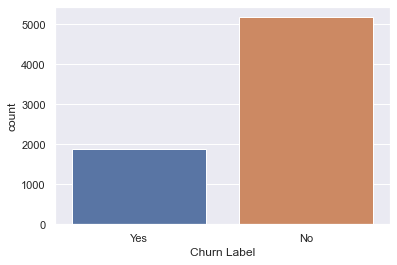

In [14]:
# we can also see using distribution plot that the target variable in the dataset is unbalanced

sns.countplot(x = 'Churn Label', data=df_new)

#### Numerical Features

In [15]:
# There are four numerical features i.e MonthlyCharges, TotalCharges, tenure and CLTV. 

<Figure size 720x288 with 0 Axes>

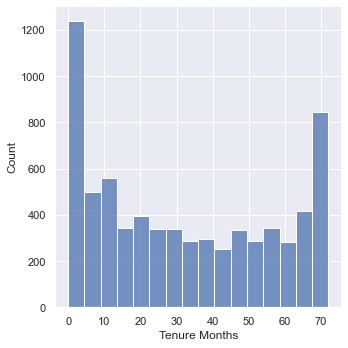

In [16]:
plt.figure(figsize=(10, 4))
sns.displot(data=df_new, x="Tenure Months")

In [17]:
# From the above plot we can observe that its a bimodal distribution
# There are two extremes of customers 

<AxesSubplot:title={'center':'KDE Plot for Tenure in months'}, xlabel='Tenure Months', ylabel='Density'>

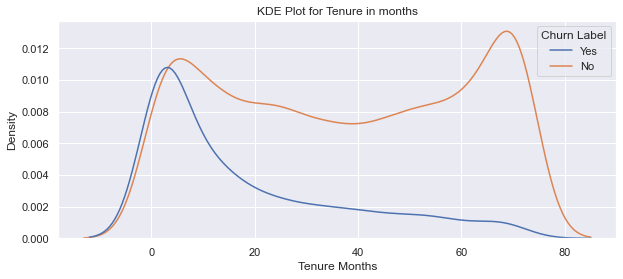

In [18]:
# we are plotting the probability density function against the target feature
# Visualizing the kernel density estimation of Tenure in months for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for Tenure in months')
sns.kdeplot(data=df_new, x="Tenure Months", hue="Churn Label")

In [19]:
# From the above plot we can observe that the customers who have recently joined are more likely to churn

<AxesSubplot:title={'center':'KDE Plot for Monthly Charges'}, xlabel='Monthly Charges', ylabel='Density'>

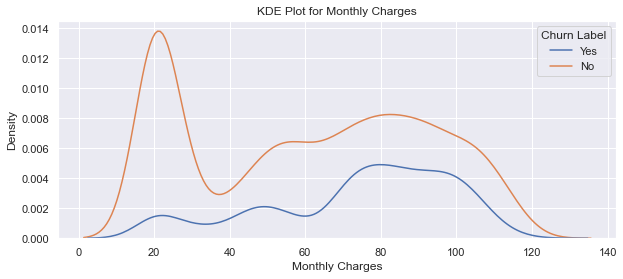

In [20]:
# Visualizing the kernel density estimation of Monthly Charges for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for Monthly Charges')
sns.kdeplot(data=df_new, x="Monthly Charges", hue="Churn Label")

In [21]:
# From the above plot we can observe that the customers with higher monthly charges are more likely to churn

<AxesSubplot:title={'center':'KDE Plot for Total Charges'}, xlabel='Total Charges', ylabel='Density'>

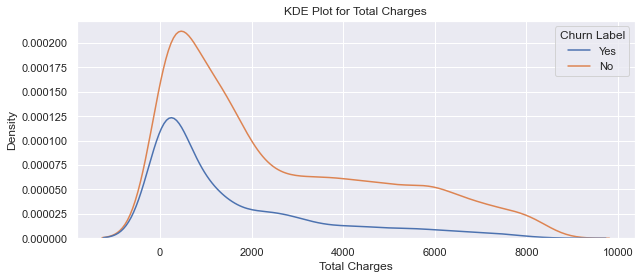

In [22]:
# Visualizing the kernel density estimation of Total Charges for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for Total Charges')
sns.kdeplot(data=df_new, x="Total Charges", hue="Churn Label")

In [23]:
# Tenure in months and Monthly Charges are important features

<AxesSubplot:title={'center':'KDE Plot for CLTV'}, xlabel='CLTV', ylabel='Density'>

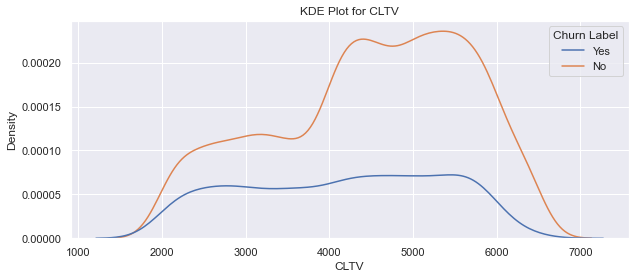

In [24]:
# Visualizing the kernel density estimation of CLTV for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for CLTV')
sns.kdeplot(data=df_new, x="CLTV", hue="Churn Label")

In [25]:
# we need to come up with strategies to reduce churn specially with customer with high CLTV

#### Categorical Features

<AxesSubplot:xlabel='count', ylabel='City'>

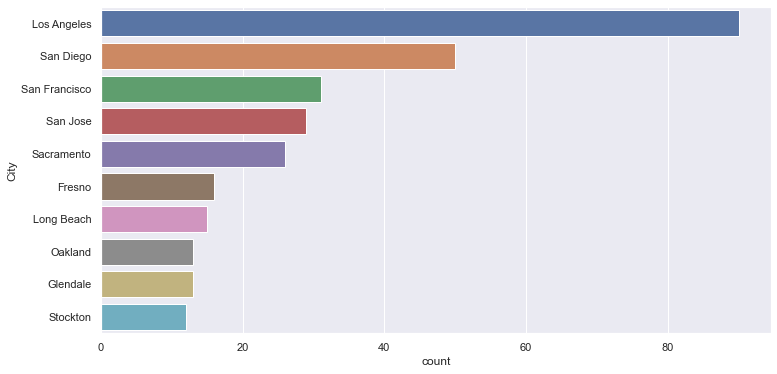

In [26]:
# plotting distribution of customer churn for differnt cities
plt.figure(figsize=(12, 6))
cities = df_new.loc[df['Churn Label'] == 'Yes'].groupby('City')['Churn Label'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

sns.barplot(x='count',y='City',data=cities)

In [27]:
# From the above table we can say that the highest churn is recorded in cities Los Angeles and San Diego

<AxesSubplot:xlabel='count', ylabel='Churn Reason'>

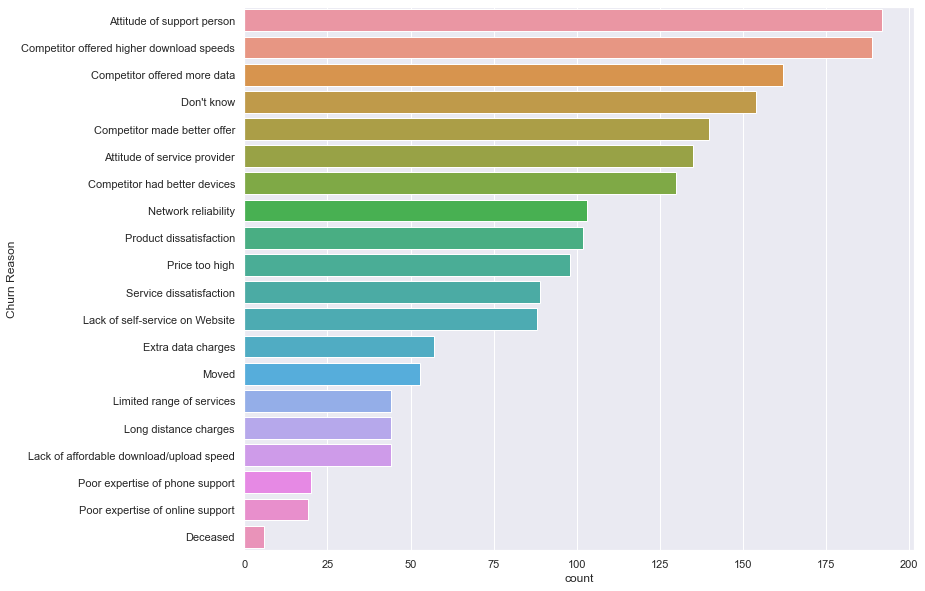

In [28]:
# plotting distribution of customer churn for differnt reasons
plt.figure(figsize=(12, 10))
reasons = df_new.loc[df['Churn Label'] == 'Yes'].groupby('Churn Reason')['Churn Label'].count().reset_index(name='count').sort_values(['count'], ascending=False)

sns.barplot(x='count',y='Churn Reason',data=reasons)

In [29]:
# From the above table we can observe that highest churn is due to
# dissatisfaction from support service and the internet speed and data

In [30]:
df_new.head(5)

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,3668-QPYBK,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.7,Yes,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.4,Yes,2701,Moved
2,9305-CDSKC,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,797.2,Yes,5372,Moved
3,7892-POOKP,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,2934.4,Yes,5003,Moved
4,0280-XJGEX,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5081.3,Yes,5340,Competitor had better devices


<AxesSubplot:xlabel='Gender', ylabel='count'>

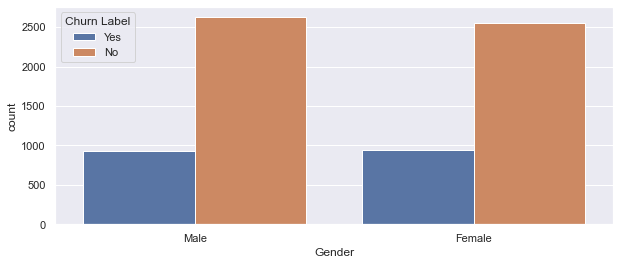

In [31]:
# Visualizing the distribution of Gender for Churn Label Yes and No

plt.figure(figsize=(10, 4))
#plt.title('Distribution of Gender for Churn Label Yes and No')
sns.countplot(data=df_new, x="Gender", hue="Churn Label")

In [32]:
# From above figure we can observe that feature Gender alone has no influence on Churn Label

<AxesSubplot:xlabel='Senior Citizen', ylabel='count'>

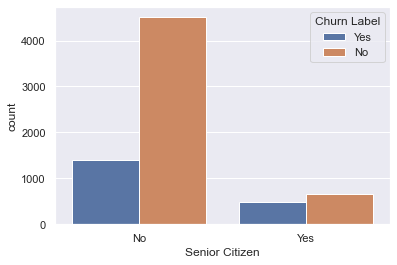

In [33]:
# Distribution of Senior Citizen for Churn Label Yes and No

sns.countplot(data=df_new, x="Senior Citizen", hue="Churn Label")

In [34]:
print('Percentage of senior citizens ' + str((df.loc[df_new['Senior Citizen'] == 'Yes']['CustomerID'].count()/df_new.shape[0])*100))
print('Percentage of churn in senior citizens ' + str((df.loc[(df_new['Senior Citizen'] == 'Yes') & (df_new['Churn Label'] == 'Yes')]['CustomerID'].count()/ df.loc[df_new['Senior Citizen'] == 'Yes']['CustomerID'].count()) * 100))

print('Percentage of churn in non - senior citizens ' + str((df.loc[(df_new['Senior Citizen'] == 'No') & (df_new['Churn Label'] == 'Yes')]['CustomerID'].count()/ df.loc[df_new['Senior Citizen'] == 'No']['CustomerID'].count()) * 100))

Percentage of senior citizens 16.21468124378816
Percentage of churn in senior citizens 41.68126094570928
Percentage of churn in non - senior citizens 23.606168446026096


In [35]:
# Here from the graph and calculations we can observe that even though there are only 16 % senior citizens 
# They have much higher churn of ~ 42% compared to non senior citizens

<AxesSubplot:xlabel='Partner', ylabel='count'>

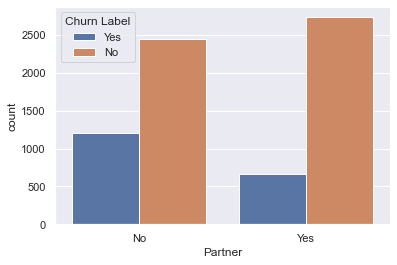

In [36]:
# Distribution of Partner for Churn Label Yes and No

sns.countplot(data=df_new, x="Partner", hue="Churn Label")

In [37]:
# customers without Dependents are more likely to churn

<AxesSubplot:xlabel='Dependents', ylabel='count'>

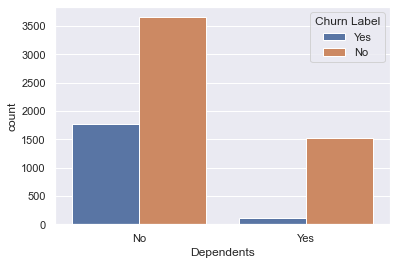

In [38]:
# Distribution of Dependents for Churn Label Yes and No

sns.countplot(data=df_new, x="Dependents", hue="Churn Label")

In [39]:
# Customers without partners are more likely to churn

<AxesSubplot:xlabel='Multiple Lines', ylabel='count'>

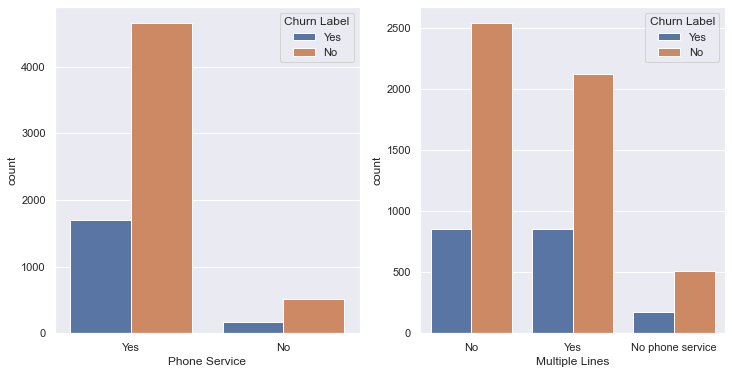

In [40]:
# Distribution of Phone Service and multiple lines for Churn Label Yes and No

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(data=df_new, x="Phone Service", hue="Churn Label", ax=axes[0])
sns.countplot(data=df_new, x="Multiple Lines", hue="Churn Label", ax=axes[1])

In [41]:
# Customer no phone service are less, customer with multiple lines have slightly higher churn

<AxesSubplot:xlabel='Internet Service', ylabel='count'>

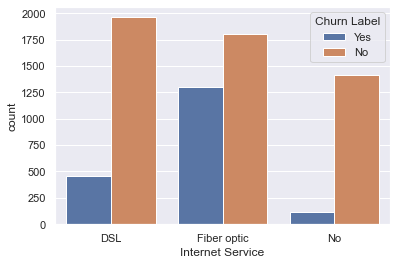

In [42]:
# Distribution of Internet Service for Churn Label Yes and No

sns.countplot(data=df_new, x="Internet Service", hue="Churn Label")

In [43]:
# Customers without internet have very low churn
# Cusotmers with fiber optic cable are more likely to churn than customers with DSL connection 

<AxesSubplot:xlabel='Device Protection', ylabel='count'>

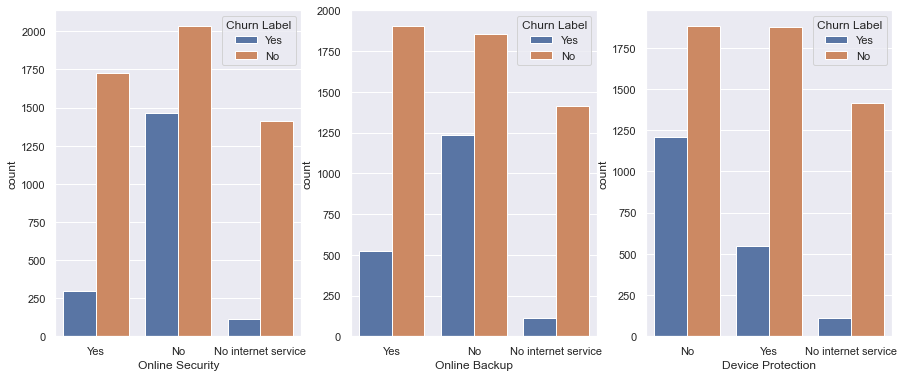

In [44]:
# Distribution of Online Security, Online Backup and Device Protection for Churn Label Yes and No

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.countplot(data=df_new, x="Online Security", hue="Churn Label", ax=axes[0])
sns.countplot(data=df_new, x="Online Backup", hue="Churn Label", ax=axes[1])
sns.countplot(data=df_new, x="Device Protection", hue="Churn Label", ax=axes[2])

In [45]:
# As also observed in previous figure customers without internet are less likely to churn
# Customer with online security are less likely to churn
# Customers with online backup are less likely to churn
# ALso customers with device protection are less likely to churn

<AxesSubplot:xlabel='Tech Support', ylabel='count'>

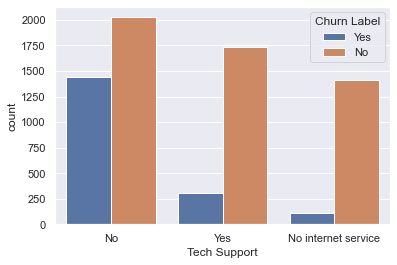

In [46]:
# Distribution of Tech Support for Churn Label Yes and No

sns.countplot(data=df_new, x="Tech Support", hue="Churn Label")

In [47]:
# Customers with Tech Support are less likely to churn

<AxesSubplot:xlabel='Streaming Movies', ylabel='count'>

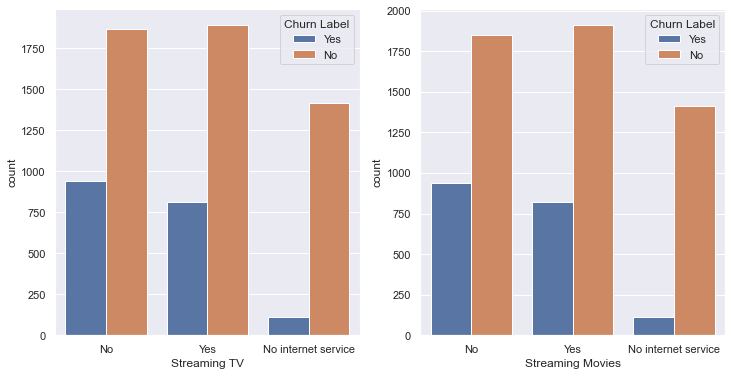

In [48]:
# Distribution of Streaming TV and Streaming Movies for Churn Label Yes and No

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(data=df_new, x="Streaming TV", hue="Churn Label", ax=axes[0])
sns.countplot(data=df_new, x="Streaming Movies", hue="Churn Label", ax=axes[1])

In [49]:
# Customers with Streaming TV and Streaeming Movies are less likely to churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

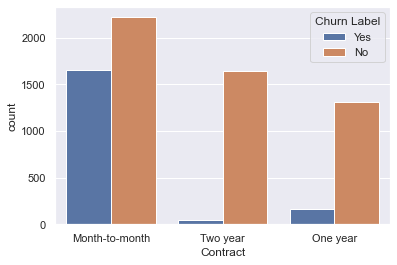

In [50]:
# Distribution of Contract for Churn Label Yes and No

sns.countplot(data=df_new, x="Contract", hue="Churn Label")

In [51]:
# From the above graph we can observe that customers one year and two year contracts are less likely to churn

<AxesSubplot:xlabel='Paperless Billing', ylabel='count'>

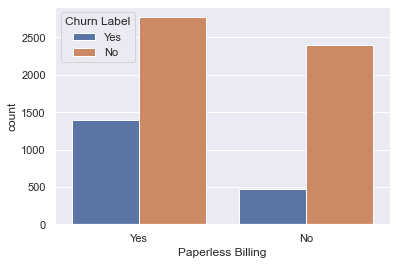

In [52]:
# Distribution of Paperless Billing for Churn Label Yes and No

sns.countplot(data=df_new, x="Paperless Billing", hue="Churn Label")

In [53]:
# From above plot we can observe that customers with paperless billing are more likely to churn

<AxesSubplot:xlabel='count', ylabel='Payment Method'>

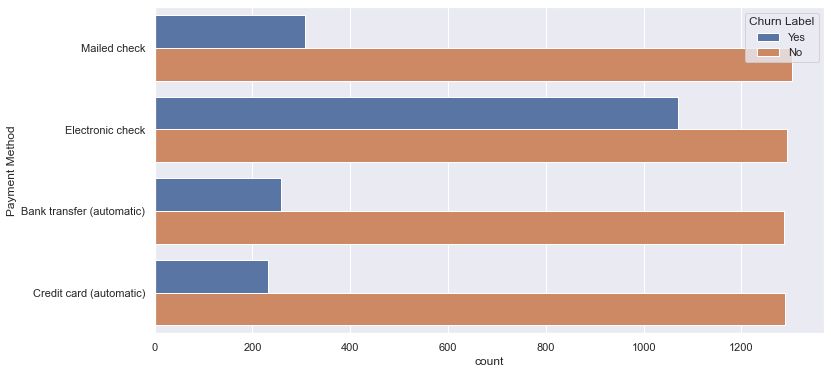

In [54]:
# Distribution of Payment Method for Churn Label Yes and No
plt.figure(figsize=(12, 6))
sns.countplot(data=df_new, y="Payment Method", hue="Churn Label")

In [55]:
# From the above plot we can observe that customers with electronic check are more likely to churn

### Feature Correlation

In [56]:
# Numerical Feature Correlation

numerical = df_new[["Tenure Months", "Monthly Charges", "Total Charges", "CLTV"]]
corr_matrix = numerical.corr()
corr_matrix

,Tenure Months,Monthly Charges,Total Charges,CLTV
Tenure Months,1.000000,0.247900,0.826568,0.396406
Monthly Charges,0.247900,1.000000,0.651566,0.098693
Total Charges,0.826568,0.651566,1.000000,0.341866
CLTV,0.396406,0.098693,0.341866,1.000000


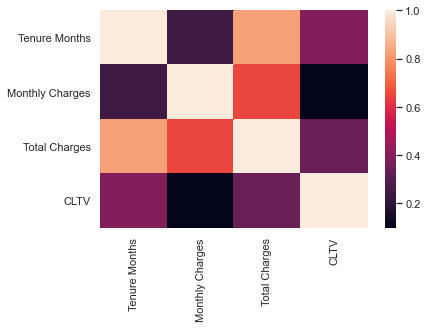

In [57]:
sns.heatmap(corr_matrix);

In [58]:
# We can observe that Tenure Months and Total Charges are highly correlated
# Similarly Total Charges and Monthly Charges are correlated

In [59]:
# Categorical feature correlation

In [60]:
# dropping the numerical columns
categorical = df_new.drop(['CustomerID', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 
                           'Churn Label', 'Churn Reason', 'City'],
        axis=1)
corr = categorical.apply(lambda x: pd.factorize(x)[0]).corr()
corr

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
Gender,1.000000,0.001874,0.001808,-0.005229,-0.006488,0.000485,0.000863,-0.014418,-0.012230,-0.005092,-0.000985,-0.001156,0.000191,-0.006171,-0.011754,0.010709
Senior Citizen,0.001874,1.000000,0.016479,-0.174396,-0.008576,0.099883,-0.032310,-0.081878,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.109299,-0.156530,0.035614
Partner,0.001808,0.016479,1.000000,0.363430,-0.017706,0.090981,0.000891,-0.091303,-0.090753,0.094451,0.069072,0.080127,0.075779,0.216229,0.014877,0.143949
Dependents,-0.005229,-0.174396,0.363430,1.000000,-0.000625,-0.021274,0.082993,0.068180,0.093810,0.168466,0.194620,0.149031,0.139249,0.116320,0.118963,0.022624
Phone Service,-0.006488,-0.008576,-0.017706,-0.000625,1.000000,0.691070,-0.387436,-0.159989,-0.129770,-0.138755,-0.123350,-0.171538,-0.165205,0.000955,0.016505,0.001724
Multiple Lines,0.000485,0.099883,0.090981,-0.021274,0.691070,1.000000,-0.340949,-0.284060,-0.303476,-0.200463,-0.232155,-0.202414,-0.195815,0.040607,-0.108230,0.126071
Internet Service,0.000863,-0.032310,0.000891,0.082993,-0.387436,-0.340949,1.000000,0.720587,0.650962,0.662957,0.609795,0.712890,0.709020,0.045064,0.138625,-0.092141
Online Security,-0.014418,-0.081878,-0.091303,0.068180,-0.159989,-0.284060,0.720587,1.000000,0.705166,0.600200,0.583673,0.634075,0.629174,-0.040162,0.184993,-0.175390
Online Backup,-0.012230,-0.144828,-0.090753,0.093810,-0.129770,-0.303476,0.650962,0.705166,1.000000,0.601503,0.617003,0.604117,0.606863,-0.006467,0.260715,-0.181936
Device Protection,-0.005092,-0.157095,0.094451,0.168466,-0.138755,-0.200463,0.662957,0.600200,0.601503,1.000000,0.767970,0.763279,0.766821,0.280997,0.276326,-0.016783


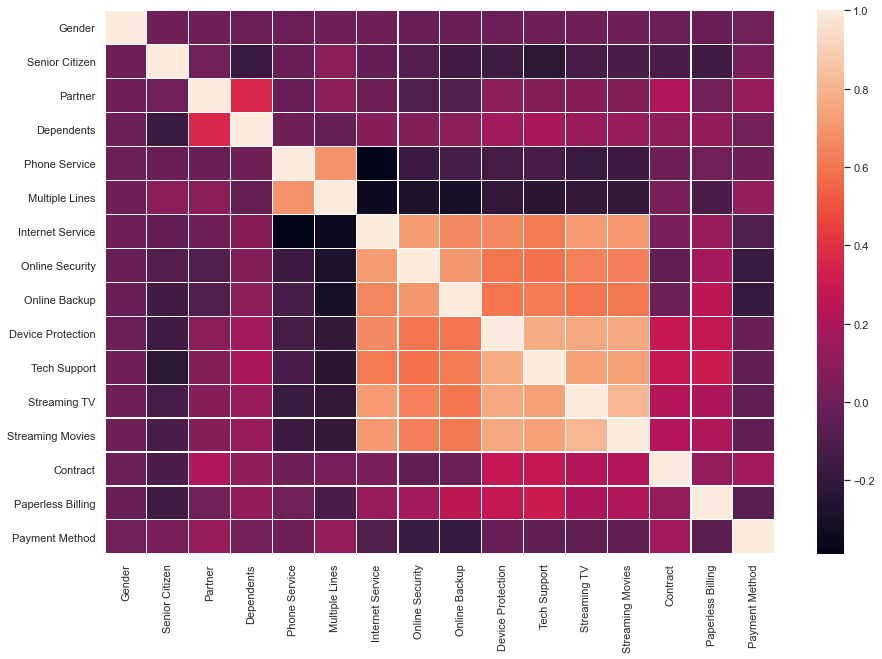

In [61]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, linewidths=.1);

In [62]:
# From the above heatmap we can observe that Phone Service and Multiple Lines are correlated, 
# similarly Internet Service, Online Security, Device Protection, Tech Support, Streaming TV 
# and Streaming Movies are correlated 

### Feature Importance

In [63]:
# Here we are using Random Forest classifier for the feature importance

params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode

df_features_to_use = df_new[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months' ,'Phone Service', 
                       'Multiple Lines' , 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
                       'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 
                       'Monthly Charges', 'Total Charges','Churn Label', 'CLTV']].copy()
df_encoded = pd.get_dummies(df_features_to_use)

df_encoded

,Tenure Months,Monthly Charges,Total Charges,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label_No,Churn Label_Yes
0,2,53.85,107.7,3239,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
1,2,70.70,141.4,2701,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
2,8,99.65,797.2,5372,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
3,28,104.80,2934.4,5003,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
4,49,103.70,5081.3,5340,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1522.8,5306,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0
7039,24,84.80,2035.2,2140,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7040,72,103.20,7430.4,5560,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7041,11,29.60,325.6,2793,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0


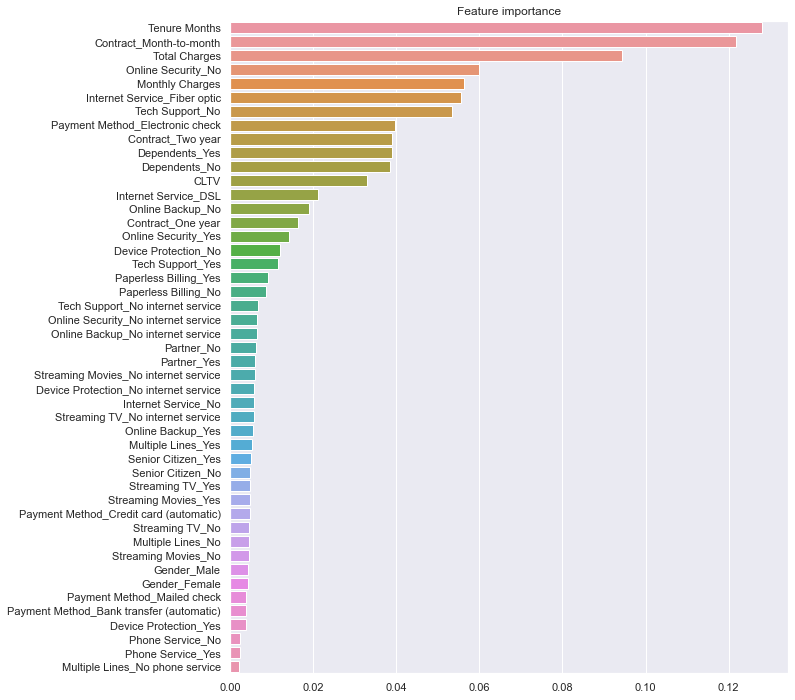

In [64]:
x, y = df_encoded.drop(['Churn Label_Yes','Churn Label_No'],axis=1), df_encoded['Churn Label_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

In [65]:
# As we have also observed in exploratory data analysis numerical features Tenure Months, Monthly Charges and Total Charges
# are very important features to predict churn also categorical features Contract Month_to_month are likely to churn
# The above obtained results are in line with the results obtained in EDA

### Model creation and evaluation

#### Logistic Regression Classifier

In [66]:
# Scaling all the variables to a range of 0 to 1
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
X = pd.DataFrame(scaler.transform(x))
X.columns = features

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [68]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
result = model.fit(X_train, y_train)

In [69]:
y_pred_test = model.predict(X_test)
lg_acc = accuracy_score(y_test, y_pred_test)
lg_acc

0.754850922858495

In [70]:
# Here accuracy score is not a good measure as the dataset is unbalanced means that there are
# more records which are not customer churn and therefore model is trained more to classify customer which did not churn

In [71]:
# therefore finding confusion matrix which is a way to express how many of a classifier's predictions were correct, and
# when incorrect, where the classifier got confused. here the rows represents the true labels and columns
# represents the predicted labels . values on the diagonal represent the number of times where the predicted label matches
# the true label and other cells represents where the classifier mislabeled an observation.

In [72]:
# Confusion matric
confusion_matrix(y_test, y_pred_test)

array([[1123,  401],
       [ 117,  472]], dtype=int64)

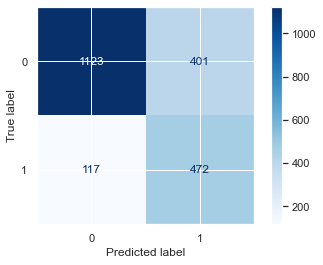

In [73]:
# View confusion matrix for test data and predictions
metrics.plot_confusion_matrix(model, X_test, y_test, cmap="Blues")

In [74]:
# To get more insight, we are examining more metrics like precision, recall and F1 Score

In [75]:
# Precision is the number of correctly-identified members of a class divided by all the time model predicted that class.
# Recall is the number of members of a class that the classifier identified correctly divided by the totalnumbers of 
# members in that class.
# F1 Score is a little less intuitive because it combines precision and recall into one metric, if precision and recall are
# both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low.
# F1 is a quick way to tell whether the classifier is actually good at identifying members of a class.

In [76]:
# Classfication report

In [77]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1524
           1       0.54      0.80      0.65       589

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.80      0.75      0.77      2113



In [78]:
lg_prec = metrics.precision_score(y_test, y_pred_test)
lg_rec = metrics.recall_score(y_test, y_pred_test)
lg_f1 = metrics.f1_score(y_test, y_pred_test)
print("precision = " + str(lg_prec))
print("recall = " + str(lg_rec))
print("f1 score = " + str(lg_f1))

precision = 0.5406643757159221
recall = 0.801358234295416
f1 score = 0.6456908344733242


In [79]:
# Similarly compute ROC curve and ROC area for each class
lg_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
lg_auc_roc

0.8548665606103142

In [80]:
# Here the function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.
# The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

Random: ROC AUC=0.500
Logistic Regression: ROC AUC=0.855


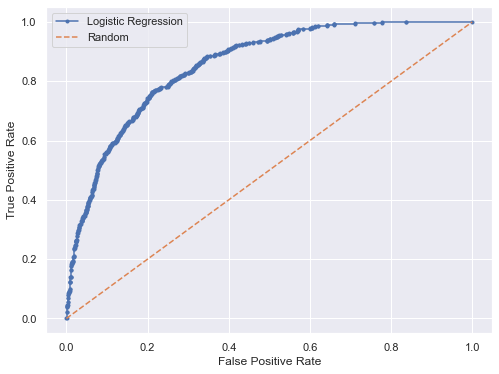

In [81]:
plt.figure(figsize=(8, 6))
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Naive Bayes Classifier

In [82]:
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
X = pd.DataFrame(scaler.transform(x))
X.columns = features

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
model = GaussianNB()
result = model.fit(X_train, y_train)

In [85]:
y_pred_test = model.predict(X_test)
nb_acc = accuracy_score(y_test, y_pred_test)
nb_acc

0.7203028868906768

In [86]:
# therefore finding confusion matrix which is a way to express how many of a classifier's predictions were correct, and
# when incorrect, where the classifier got confused. here the rows represents the true labels and columns
# represents the predicted labels . values on the diagonal represent the number of times where the predicted label matches
# the true label and other cells represents where the classifier mislabeled an observation.

In [87]:
# Confusion matric
confusion_matrix(y_test, y_pred_test)

array([[1038,  486],
       [ 105,  484]], dtype=int64)

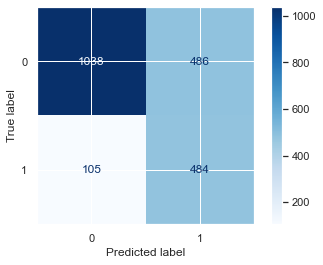

In [88]:
# View confusion matrix for test data and predictions
metrics.plot_confusion_matrix(model, X_test, y_test, cmap="Blues")

In [89]:
# Classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1524
           1       0.50      0.82      0.62       589

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.72      0.73      2113



In [90]:
nb_prec = metrics.precision_score(y_test, y_pred_test)
nb_rec = metrics.recall_score(y_test, y_pred_test)
nb_f1 = metrics.f1_score(y_test, y_pred_test)
print("precision = " + str(nb_prec))
print("recall = " + str(nb_rec))
print("f1 score = " + str(nb_f1))

precision = 0.49896907216494846
recall = 0.8217317487266553
f1 score = 0.6209108402822322


In [91]:
# Similarly compute ROC curve and ROC area for each class
nb_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
nb_auc_roc

0.8248387988004047

In [92]:
# Here the function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.
# The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

Random: ROC AUC=0.500
Naive Bayes: ROC AUC=0.825


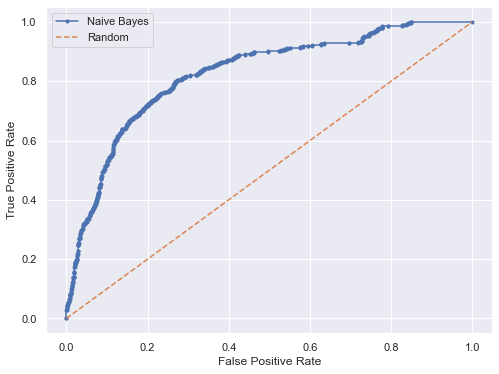

In [93]:
plt.figure(figsize=(8, 6))
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
# summarize scores
print('Random: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
# plot the roc curve for the model
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### Random Forest Classifier

In [94]:
# As we have also observed in exploratory data analysis numerical features Tenure Months, Monthly Charges and Total Charges
# are very important features to predict churn also categorical features Contract Month_to_month are likely to churn
# The above obtained results are in line with the results obtained in EDA

In [95]:
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
X = pd.DataFrame(scaler.transform(x))
X.columns = features

In [96]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [97]:
# View accuracy score
model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30, class_weight='balanced')
result = model.fit(X_train, y_train)

In [98]:
y_pred_test = model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_test)
rf_acc

0.7660420215786485

In [99]:
# Here accuracy score is not a good measure as the dataset is unbalanced means that there are
# more records which are not customer churn and therefore model is trained more to classify customer which did not churn

In [100]:
# therefore finding confusion matrix which is a way to express how many of a classifier's predictions were correct, and
# when incorrect, where the classifier got confused. here the rows represents the true labels and columns
# represents the predicted labels . values on the diagonal represent the number of times where the predicted label matches
# the true label and other cells represents where the classifier mislabeled an observation.

In [101]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[976, 318],
       [ 94, 373]], dtype=int64)

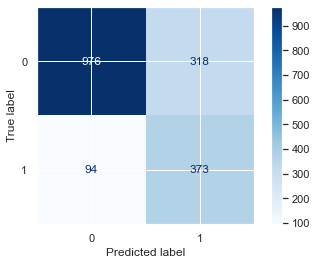

In [102]:
metrics.plot_confusion_matrix(model, X_test, y_test, cmap="Blues")

In [103]:
# To get more insight, we are examining more metrics like precision, recall and F1 Score

In [104]:
# Precision is the number of correctly-identified members of a class divided by all the time model predicted that class.
# Recall is the number of members of a class that the classifier identified correctly divided by the total numbers of 
# members in that class.
# F1 Score is a little less intuitive because it combines precision and recall into one metric, if precision and recall are
# both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low.
# F1 is a quick way to tell whether the classifier is actually good at identifying members of a class.

In [105]:
# Classfication report

In [106]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.83      1294
           1       0.54      0.80      0.64       467

    accuracy                           0.77      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.81      0.77      0.78      1761



In [107]:
rf_prec = metrics.precision_score(y_test, y_pred_test)
rf_rec = metrics.recall_score(y_test, y_pred_test)
rf_f1 = metrics.f1_score(y_test, y_pred_test)
print("precision = " + str(rf_prec))
print("recall = " + str(rf_rec))
print("f1 score = " + str(rf_f1))

precision = 0.5397973950795948
recall = 0.7987152034261242
f1 score = 0.6442141623488774


In [108]:
# Similarly compute ROC curve and ROC area for each class
rf_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
rf_auc_roc

0.8540364191177201

In [109]:
# Here the function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.
# The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

Random: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.854


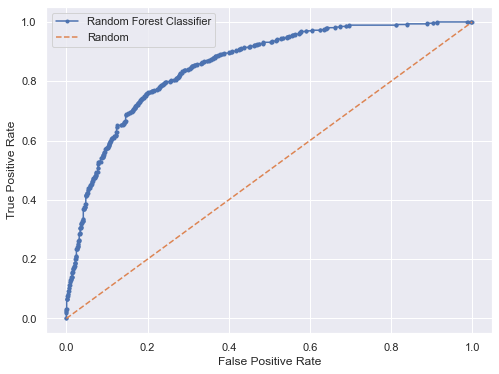

In [110]:
plt.figure(figsize=(8, 6))
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('Random: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### XG Boost Classifier

In [111]:
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
X = pd.DataFrame(scaler.transform(x))
X.columns = features

In [112]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [113]:
# View accuracy score
model = GradientBoostingClassifier()
result = model.fit(X_train, y_train)

In [114]:
y_pred_test = model.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_test)
gb_acc

0.8114707552526973

In [115]:
# Here accuracy score is not a good measure as the dataset is unbalanced means that there are
# more records which are not customer churn and therefore model is trained more to classify customer which did not churn

In [116]:
# therefore finding confusion matrix which is a way to express how many of a classifier's predictions were correct, and
# when incorrect, where the classifier got confused. here the rows represents the true labels and columns
# represents the predicted labels . values on the diagonal represent the number of times where the predicted label matches
# the true label and other cells represents where the classifier mislabeled an observation.

In [117]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[1168,  126],
       [ 206,  261]], dtype=int64)

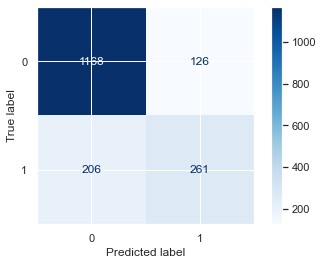

In [118]:
metrics.plot_confusion_matrix(model, X_test, y_test, cmap="Blues")

In [119]:
# To get more insight, we are examining more metrics like precision, recall and F1 Score

In [120]:
# Precision is the number of correctly-identified members of a class divided by all the time model predicted that class.
# Recall is the number of members of a class that the classifier identified correctly divided by the totalnumbers of 
# members in that class.
# F1 Score is a little less intuitive because it combines precision and recall into one metric, if precision and recall are
# both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low.
# F1 is a quick way to tell whether the classifier is actually good at identifying members of a class.

In [121]:
# Classfication report

In [122]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1294
           1       0.67      0.56      0.61       467

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.81      1761



In [123]:
gb_prec = metrics.precision_score(y_test, y_pred_test)
gb_rec = metrics.recall_score(y_test, y_pred_test)
gb_f1 = metrics.f1_score(y_test, y_pred_test)
print("precision = " + str(gb_prec))
print("recall = " + str(gb_rec))
print("f1 score = " + str(gb_f1))

precision = 0.6744186046511628
recall = 0.5588865096359743
f1 score = 0.6112412177985947


In [124]:
# Similarly compute ROC curve and ROC area for each class
gb_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
gb_auc_roc

0.8569571635186615

In [125]:
# Here the function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.
# The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

Random: ROC AUC=0.500
Gradient Boosting Classifier: ROC AUC=0.857


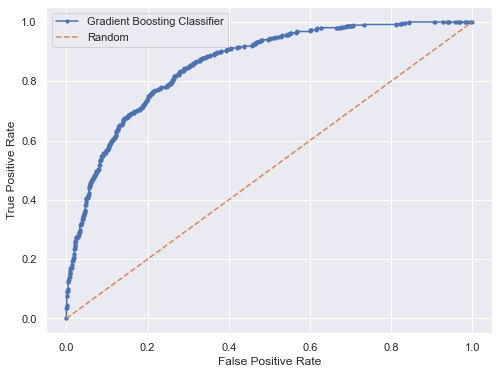

In [126]:
plt.figure(figsize=(8, 6))
ns_probs = [0 for _ in range(len(y_test))]
gb_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
# summarize scores
print('Random: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting Classifier: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
# plot the roc curve for the model
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting Classifier')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Comparing models

#### Comparison of roc aoc for different classifiers  

Random: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.855
Naive Bayes Classifier: ROC AUC=0.825
Random Forest Classifier: ROC AUC=0.854
Gradient Boosting Classifier: ROC AUC=0.857


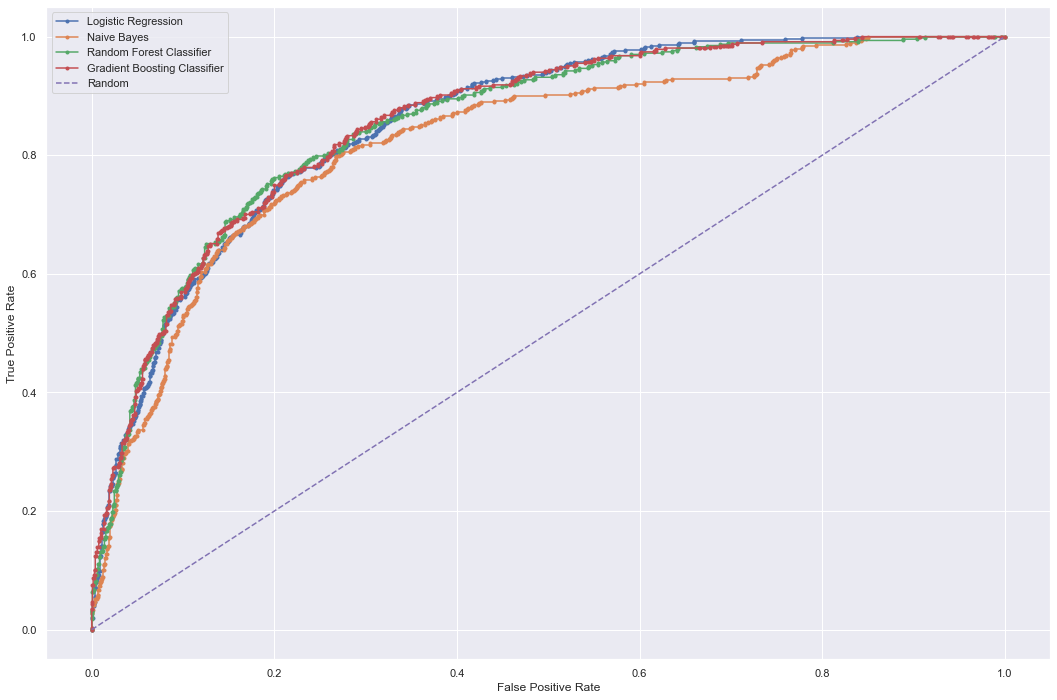

In [127]:
plt.figure(figsize=(18, 12))
ns_probs = [0 for _ in range(len(y_test))]
print('Random: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes Classifier: ROC AUC=%.3f' % (nb_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (rf_auc))
print('Gradient Boosting Classifier: ROC AUC=%.3f' % (gb_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting Classifier')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [128]:
# ROC-AUC provides us to plot graph between True Positive Rate and False Positive Rate for different threshold values

# Here random forest and Gradient Boosting models are performing well compared to other models, 
# After a p-value of # the False Positive Rate is sharply inceasing

#### Tabular representation of diffrent metrics for different models

In [129]:
models_info_list = {'Models':['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Gradient Boosting'],
        'Accuracy':[lg_acc, nb_acc, rf_acc, gb_acc],
        'Precision':[lg_prec, nb_prec, rf_prec, gb_prec],
        'Recall':[lg_rec, nb_rec, rf_rec, gb_rec],
        'F1 Score':[lg_f1, nb_f1, rf_f1, gb_f1],
        'Roc-Auc':[lg_auc_roc, nb_auc_roc, rf_auc_roc, gb_auc_roc]}

In [130]:
models_info_list_df = pd.DataFrame(models_info_list)
models_info_list_df

,Models,Accuracy,Precision,Recall,F1 Score,Roc-Auc
0,Logistic Regression,0.754851,0.540664,0.801358,0.645691,0.854867
1,Naive Bayes,0.720303,0.498969,0.821732,0.620911,0.824839
2,Random Forest,0.766042,0.539797,0.798715,0.644214,0.854036
3,Gradient Boosting,0.811471,0.674419,0.558887,0.611241,0.856957


In [131]:
#sns.barplot(models_info_list_df)
models_info_list_df_melt = pd.melt(models_info_list_df, id_vars="Models", var_name="Metric", value_name="Value")
models_info_list_df_melt

,Models,Metric,Value
0,Logistic Regression,Accuracy,0.754851
1,Naive Bayes,Accuracy,0.720303
2,Random Forest,Accuracy,0.766042
3,Gradient Boosting,Accuracy,0.811471
4,Logistic Regression,Precision,0.540664
5,Naive Bayes,Precision,0.498969
6,Random Forest,Precision,0.539797
7,Gradient Boosting,Precision,0.674419
8,Logistic Regression,Recall,0.801358
9,Naive Bayes,Recall,0.821732


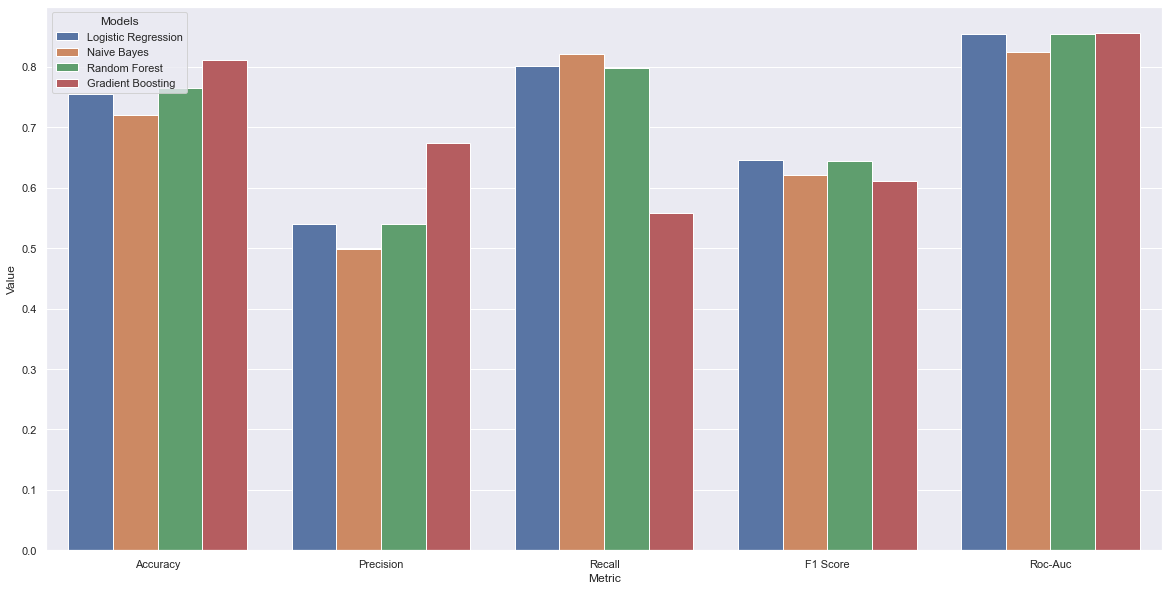

In [132]:
fig, ax = plt.subplots(figsize=(20, 10))
#plt.figure(figsize=(12,3))
#plt.title('Catplot for different models for different metrics')
g = sns.barplot(x='Metric', y='Value', hue='Models', data=models_info_list_df_melt, ax=ax)
#plt.close(1)
plt.show()

In [133]:
# The precision and recall measures are also widely used in classification. Precision
# can be thought of as a measure of exactness (i.e., what percentage of tuples labeled as
# positive are actually such), whereas recall is a measure of completeness (what percentage
# of positive tuples are labeled as such). If recall seems familiar, that’s because it is the same
# as sensitivity (or the true positive rate). These measures can be computed as

# precision = TP / (TP + FP)

# recall = TP / (TP + FN) = TP / P

In [134]:
# A perfect precision score of 1.0 for a class C means that every tuple that the classifier
# labeled as belonging to class C does indeed belong to class C. However, it does not tell
# us anything about the number of class C tuples that the classifier mislabeled. A perfect
# recall score of 1.0 for C means that every item from class C was labeled as such, but it
# does not tell us how many other tuples were incorrectly labeled as belonging to class C.

# There tends to be an inverse relationship between precision and recall, where it is possi-
# ble to increase one at the cost of reducing the other.




# From the above data we can see that even though the accuracy and roc-auc is higher for ensamble methods like 
# Random forest and Gradient Boosting Algorithm but the recall is highest in Logistic Regression and Naive Bayes
# Recall = TP/ (TP + FN) = TP/P , A perfect recall score of 1.0 for a class C means that every item
# from class C  was labelled as such but it does not tell us how many other tuples were incorrectly labelled as belonging 
# to class C i.e it does not tell us about false positive. Here we can tolerate False positive but can't tolerate False 
# Negative as it be loss to the revenue of the organization.

# Here we have taken an aribitrary cutoff recall score of 0.8 to select our models

In [135]:
# Therefore from above data we can concude that in our dataset the Logistic Regression and Naive Bayes classifier
# are providing good recall score and good roc-auc score.